In [1]:
import os
import matplotlib.pyplot as plt
import pims
# import pims.BioformatsReader
import sys
import numpy as np
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model
import pandas as pd
from nd2reader import ND2Reader
import glob
import csv
plot = True

import contextlib
import io
from cellpose import io as iocp
from cellpose import plot,utils

# sys.path.insert(0,'/home/jmamede/scripts/LivePanelize')
# from libraries import initialize_reader,_read_frame,time_stack

In [2]:
# ficheiro = "/run/media/jmamede/Joao/96wells/20201119_143803_601/WellA01_ChannelGFP,DAPI_Seq0000.nd2"
# dirname = "/media/jmamede/Joao/Stephanie/20210405_131351_890/*nd2"
dirname = "/run/media/jmamede/Joao/Stephanie/20210419_113751_741/*.nd2"

filelist = glob.glob(dirname)
filelist.sort()
filelist
# metadata = frames.metadata

['/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA01_ChannelTRITC,FITC,Dapi_Seq0000.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA02_ChannelTRITC,FITC,Dapi_Seq0001.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA03_ChannelTRITC,FITC,Dapi_Seq0002.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA04_ChannelTRITC,FITC,Dapi_Seq0003.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA05_ChannelTRITC,FITC,Dapi_Seq0004.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA06_ChannelTRITC,FITC,Dapi_Seq0005.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA07_ChannelTRITC,FITC,Dapi_Seq0006.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA08_ChannelTRITC,FITC,Dapi_Seq0007.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA09_ChannelTRITC,FITC,Dapi_Seq0008.nd2',
 '/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA10_ChannelTRITC,FITC,Dapi_Seq0

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/base_frames.py:472: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


'/run/media/jmamede/Joao/Stephanie/20210419_113751_741/WellA01_ChannelTRITC,FITC,Dapi_Seq0000.nd2'

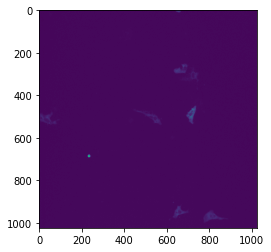

In [3]:
ficheiro = filelist[0]
reader = pims.open(ficheiro)
# print(reader.sizes)

reader.bundle_axes = 'yx'
reader.iter_axes = 'c'

#0 is ruby
#1 is iGFP
#2 is dapi
color = 0
plt.imshow(reader[color],vmin=np.min(reader[color]),vmax=np.max(reader[color]))
ficheiro

# test = dask.array.concatenate(
#     [time_stack(ficheiro,bundler='cyx') for filename in filelist[]]
# , axis=2)
# reader =  time_stack(ficheiro,bundler='cyx')
# reader = reader.reshape(1,183,1024,1024)
#Shaped into Time, Color, Y, X
# reader = reader.reshape(61,3,1024,1024)


In [4]:
# reader = ND2Reader(ficheiro)
# print(reader.sizes)

# metadata = reader.metadata
# reader.bundle_axes = 'cyx'
# reader.iter_axes = 'z'
# #there is a bug, it reads each visit point as a Z.
# reader.default_coords['v'] = 0
# #reader.sizes['z']

def plots(reader,cells_masks,nuclei_masks,base):
    from cellpose.utils import masks_to_outlines
    %matplotlib inline
    f, axarr = plt.subplots(2,2)
    print(axarr.shape)
    

    axarr[0,0].imshow(reader[0],vmin=np.min(reader[0]),vmax=np.max(reader[0])
        ,cmap="gray"
                     )
    axarr[0,0].imshow(masks_to_outlines(cells_masks),alpha=0.4,cmap='jet')
    axarr[0,1].imshow(cells_masks
                      #,alpha=0.6
        )
#     axarr[0,2].imshow(reader[i][0],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[0,2].imshow(cells_masks,alpha=0.6
#         )
    axarr[1,0].imshow(reader[2],vmin=np.min(reader[2]),vmax=np.median(reader[2]*3)
                      ,cmap="gray"
        )
    axarr[1,0].imshow(masks_to_outlines(nuclei_masks),alpha=0.4,cmap='jet')
    axarr[1,1].imshow(nuclei_masks
                      #,alpha=0.6
        )
#     axarr[1,2].imshow(reader[i][1],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[1,2].imshow(nuclei_masks
# #                 ,alpha=0.6
#         )
    plt.savefig(base+".png",dpi=600)
#     plt.show()
    return f,axarr

In [1]:
reader.sizes['m']

NameError: name 'reader' is not defined

In [ ]:

    
model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')


In [34]:
color=1
cells_masks = cellpose_mask(reader[color],model
#                             ,size=2500
                            ,flow_threshold=1.0,size=0,diam=None,cell_prob=-1.5,
                            _bin=False,
                           )
nuclei_masks = cellpose_mask(reader[2],model_nuc
#                             ,size=2500
                            ,flow_threshold=0.4,size=0,diam=25,cell_prob=0,
                             _bin=False,
                           )

processing 1 image(s)
time spent: running network 0.24s; flow+mask computation 0.00
time spent: running network 0.42s; flow+mask computation 0.54
estimated cell diameters for 1 image(s) in 1.35 sec
time spent: running network 2.90s; flow+mask computation 0.93
estimated masks for 1 image(s) in 3.84 sec
>>>> TOTAL TIME 5.19 sec
processing 1 image(s)
time spent: running network 0.66s; flow+mask computation 0.89
estimated masks for 1 image(s) in 1.55 sec
>>>> TOTAL TIME 1.55 sec


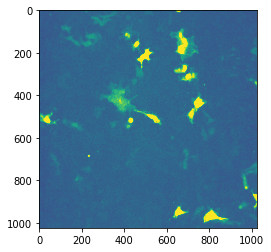

In [35]:
i=color
plt.imshow(reader[i],vmax=np.mean(reader[i]*2))


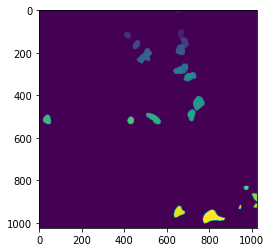

In [36]:

plt.imshow(cells_masks)

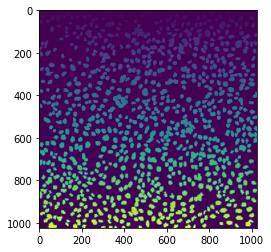

In [11]:
plt.imshow(nuclei_masks)

In [ ]:
  
model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')

# base = os.path.splitext(ficheiro)[0]
base = "/run/media/jmamede/Joao/Stephanie/20210419_113751_741/cellcounts.csv"
print(base)
f = open(base+"csv", 'wt')
output = csv.writer(f
#                     , delimiter=',',
#                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                   )
output.writerow(["FileName","visit","num_cells","infected_cells","percentage","channel1postivie","percentage channel2"])
for ficheiro in filelist:
    reader = pims.open(ficheiro)
    base = os.path.splitext(ficheiro)[0]
    reader.bundle_axes = 'yx'
    reader.iter_axes = 'c'
    with contextlib.redirect_stdout(io.StringIO()):
        for visit in range(reader.sizes['m']):
            reader.default_coords['m'] = visit
            cells_masks = cellpose_mask(reader[0],model
            #                             ,size=2500
                                       ,flow_threshold=1.0,size=0,diam=None,cell_prob=-1.5,
                            _bin=False,
                                       )
            cells_masks1 = cellpose_mask(reader[1],model
    #                             ,size=2500
                                ,flow_threshold=1.0,size=0,diam=None,cell_prob=-1.5,
                            _bin=False,
                               )
            nuclei_masks = cellpose_mask(reader[2],model_nuc
            #                             ,size=2500
                                        ,flow_threshold=0.4,size=0,diam=15,cell_prob=0
                                       )

            outlines = utils.outlines_list(cells_masks)
            iocp.outlines_to_text(base, outlines)

            fig,axarr =  plots(reader,cells_masks,nuclei_masks,base)

            text = "Image#: {0} Number of Nuclei: {1} Number of positive cells: {2} Percentage: {3} Cell2: {4} Percentage2: {5}".format(base,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max()*100,cells_masks1.max(),cells_masks1.max()/nuclei_masks.max()*100)
            print(ficheiro,text)
            output.writerow([ficheiro,visit,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max()*100,cells_masks1.max(),cells_masks1.max()/nuclei_masks.max()*100])
f.close()

** CUDA version installed and working. **
>>>> using GPU


In [4]:
filelist

NameError: name 'filelist' is not defined

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)